In [1]:
def sort_by_target(mnist):
    reorder_train = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[:60000])]))[:, 1]
    reorder_test = np.array(sorted([(target, i) for i, target in enumerate(mnist.target[60000:])]))[:, 1]
    mnist.data[:60000] = mnist.data[reorder_train]
    mnist.target[:60000] = mnist.target[reorder_train]
    mnist.data[60000:] = mnist.data[reorder_test + 60000]
    mnist.target[60000:] = mnist.target[reorder_test + 60000]

In [2]:
import numpy as np
try:
    from sklearn.datasets import fetch_openml
    mnist = fetch_openml('mnist_784', version=1, cache=True)
    mnist.target = mnist.target.astype(np.int8) # fetch_openml() returns targets as strings
    sort_by_target(mnist) # fetch_openml() returns an unsorted dataset
except ImportError:
    from sklearn.datasets import fetch_mldata
    mnist = fetch_mldata('MNIST original')
mnist["data"], mnist["target"]

(array([[0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]]),
 array([0, 0, 0, ..., 9, 9, 9], dtype=int8))

In [3]:
X, y = mnist["data"], mnist["target"]
X_train, X_test, y_train, y_test = X[:63000], X[63000:],y[:63000], y[63000:]

In [4]:
from sklearn.linear_model import SGDClassifier
sgd = SGDClassifier(random_state=42)
sgd.fit(X_train, y_train)
y_pred=sgd.predict(X_test)
score = sgd.score(X_test,y_test)
score

C:\Users\udays\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


0.828

In [27]:
from sklearn.ensemble import RandomForestClassifier
clf= RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)
y_pred1=clf.predict(X_test)
score1 = clf.score(X_test,y_test)
score1

C:\Users\udays\AppData\Local\conda\conda\envs\deeplearning\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


0.9318571428571428

The above two blocks of code performs accuracy operation based on sgd classifier and RandomForestClassifier and RandomForestClassifier performs better than sgd based on the accuracy

In [12]:
import random
my_randoms = [random.randrange(0, 7000, 1) for _ in range(10)]
my_randoms

[1907, 1732, 6359, 4001, 3736, 248, 4301, 6132, 4474, 5617]

The above piece of code generates 10 random numbers between 0 to 7000. I am using this range because my test set contains the range from 0 to 7000

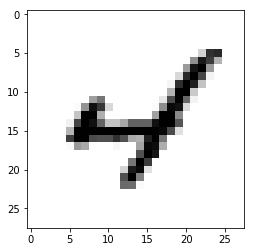

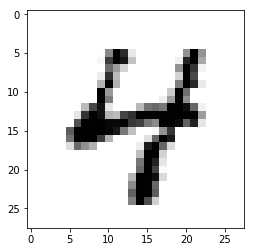

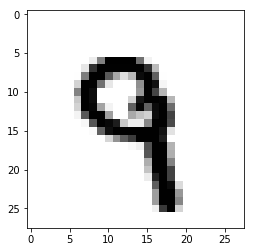

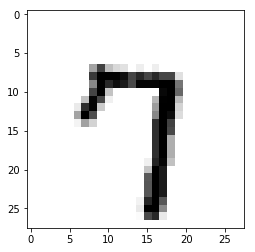

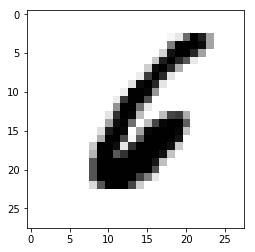

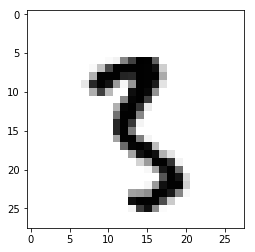

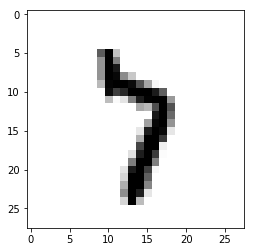

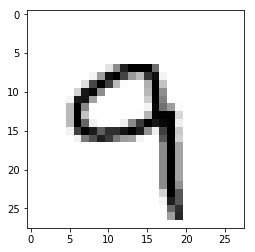

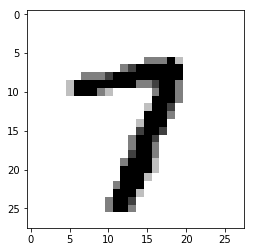

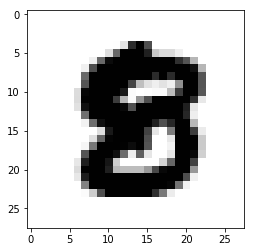

In [25]:
import matplotlib
import matplotlib.pyplot as plt
for i in my_randoms:
    some_digit = X_test[i] 
    some_digit_image = some_digit.reshape(28,28)
    plt.imshow(some_digit_image,cmap=matplotlib.cm.binary,interpolation="nearest")
    plt.show()

The above block of code prints the images of 10 random indices in the test set

In [28]:
import matplotlib
import matplotlib.pyplot as plt
for i in my_randoms:
    print(y_pred[i])     

4
4
9
7
6
8
7
9
7
8


The above block of code predicts the values predicted by the sgd_classifier and we can notice that the 3 is wrongly predicted as 8 by our model and there is a scope for improvement

In [14]:
import numpy as np
x = 2 * np.random.rand(125,1)
y = 4.2 -3.1*x + np.random.randn(125,1)

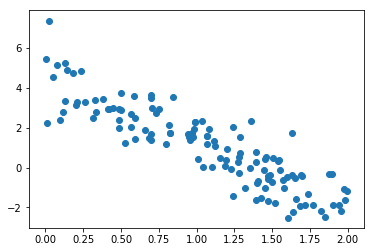

In [16]:
import matplotlib
import matplotlib.pyplot as plt
plt.scatter(x,y)
plt.show()

In [19]:
X_b = np.c_[np.ones((125,1)), x]

In [20]:
lrate = 0.01
iter = 50
m = 125
theta = np.random.randn(2,1)
print(theta)
for i in range(iter):
    grads = (2/m)*X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - lrate*grads
print(theta)

[[0.36215161]
 [0.47194245]]
[[ 0.76619231]
 [-0.12519823]]


In the above case the learning rate is too less and so the gradient descent takes more time to converge and the theta values are not optimal and requires more iterations to be optimal

In [21]:
lrate = 0.2
iter = 50
m = 125
theta = np.random.randn(2,1)
print(theta)
for i in range(iter):
    grads = (2/m)*X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - lrate*grads
print(theta)

[[-0.74219324]
 [ 1.25889062]]
[[ 4.15338658]
 [-2.94339904]]


In the above case the learning rate is appropriate and so the gradient descent seems to converge to optimal solution

In [22]:
lrate = 0.5
iter = 50
m = 125
theta = np.random.randn(2,1)
print(theta)
for i in range(iter):
    grads = (2/m)*X_b.T.dot(X_b.dot(theta)-y)
    theta = theta - lrate*grads
print(theta)

[[ 2.21847983]
 [-0.27534031]]
[[112366.1361347 ]
 [136420.99625617]]


In the above case the learning rate is high and so the gradient descent does not converge to optimal values of thetas and instead result in high values of theta